Initialization

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("train.csv")
test = pd.read_csv("test_x.csv")
submission = pd.read_csv("submission.csv")

Correlation Matrix

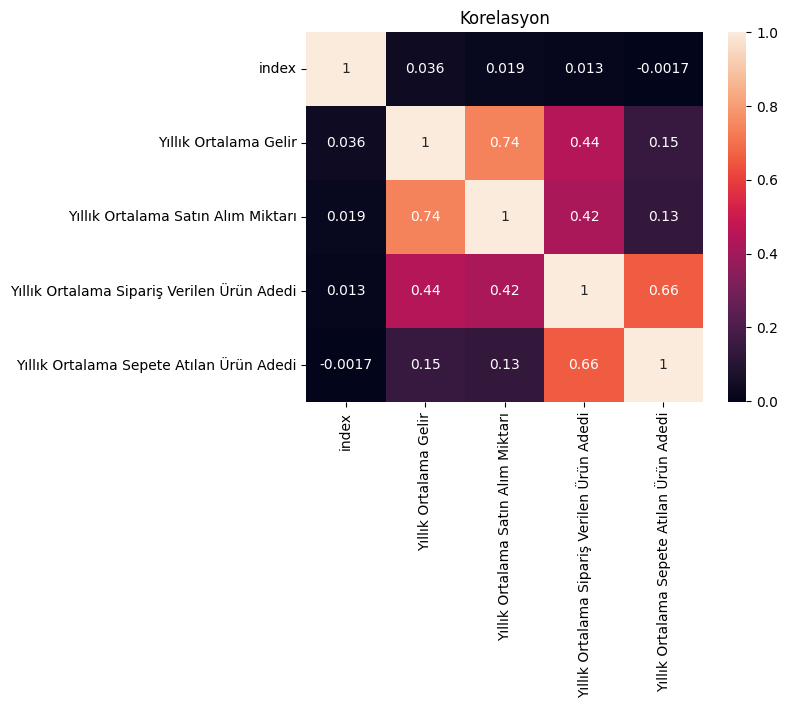

In [83]:
correlation_matrix = train._get_numeric_data().corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Korelasyon')
plt.show()

Visualization

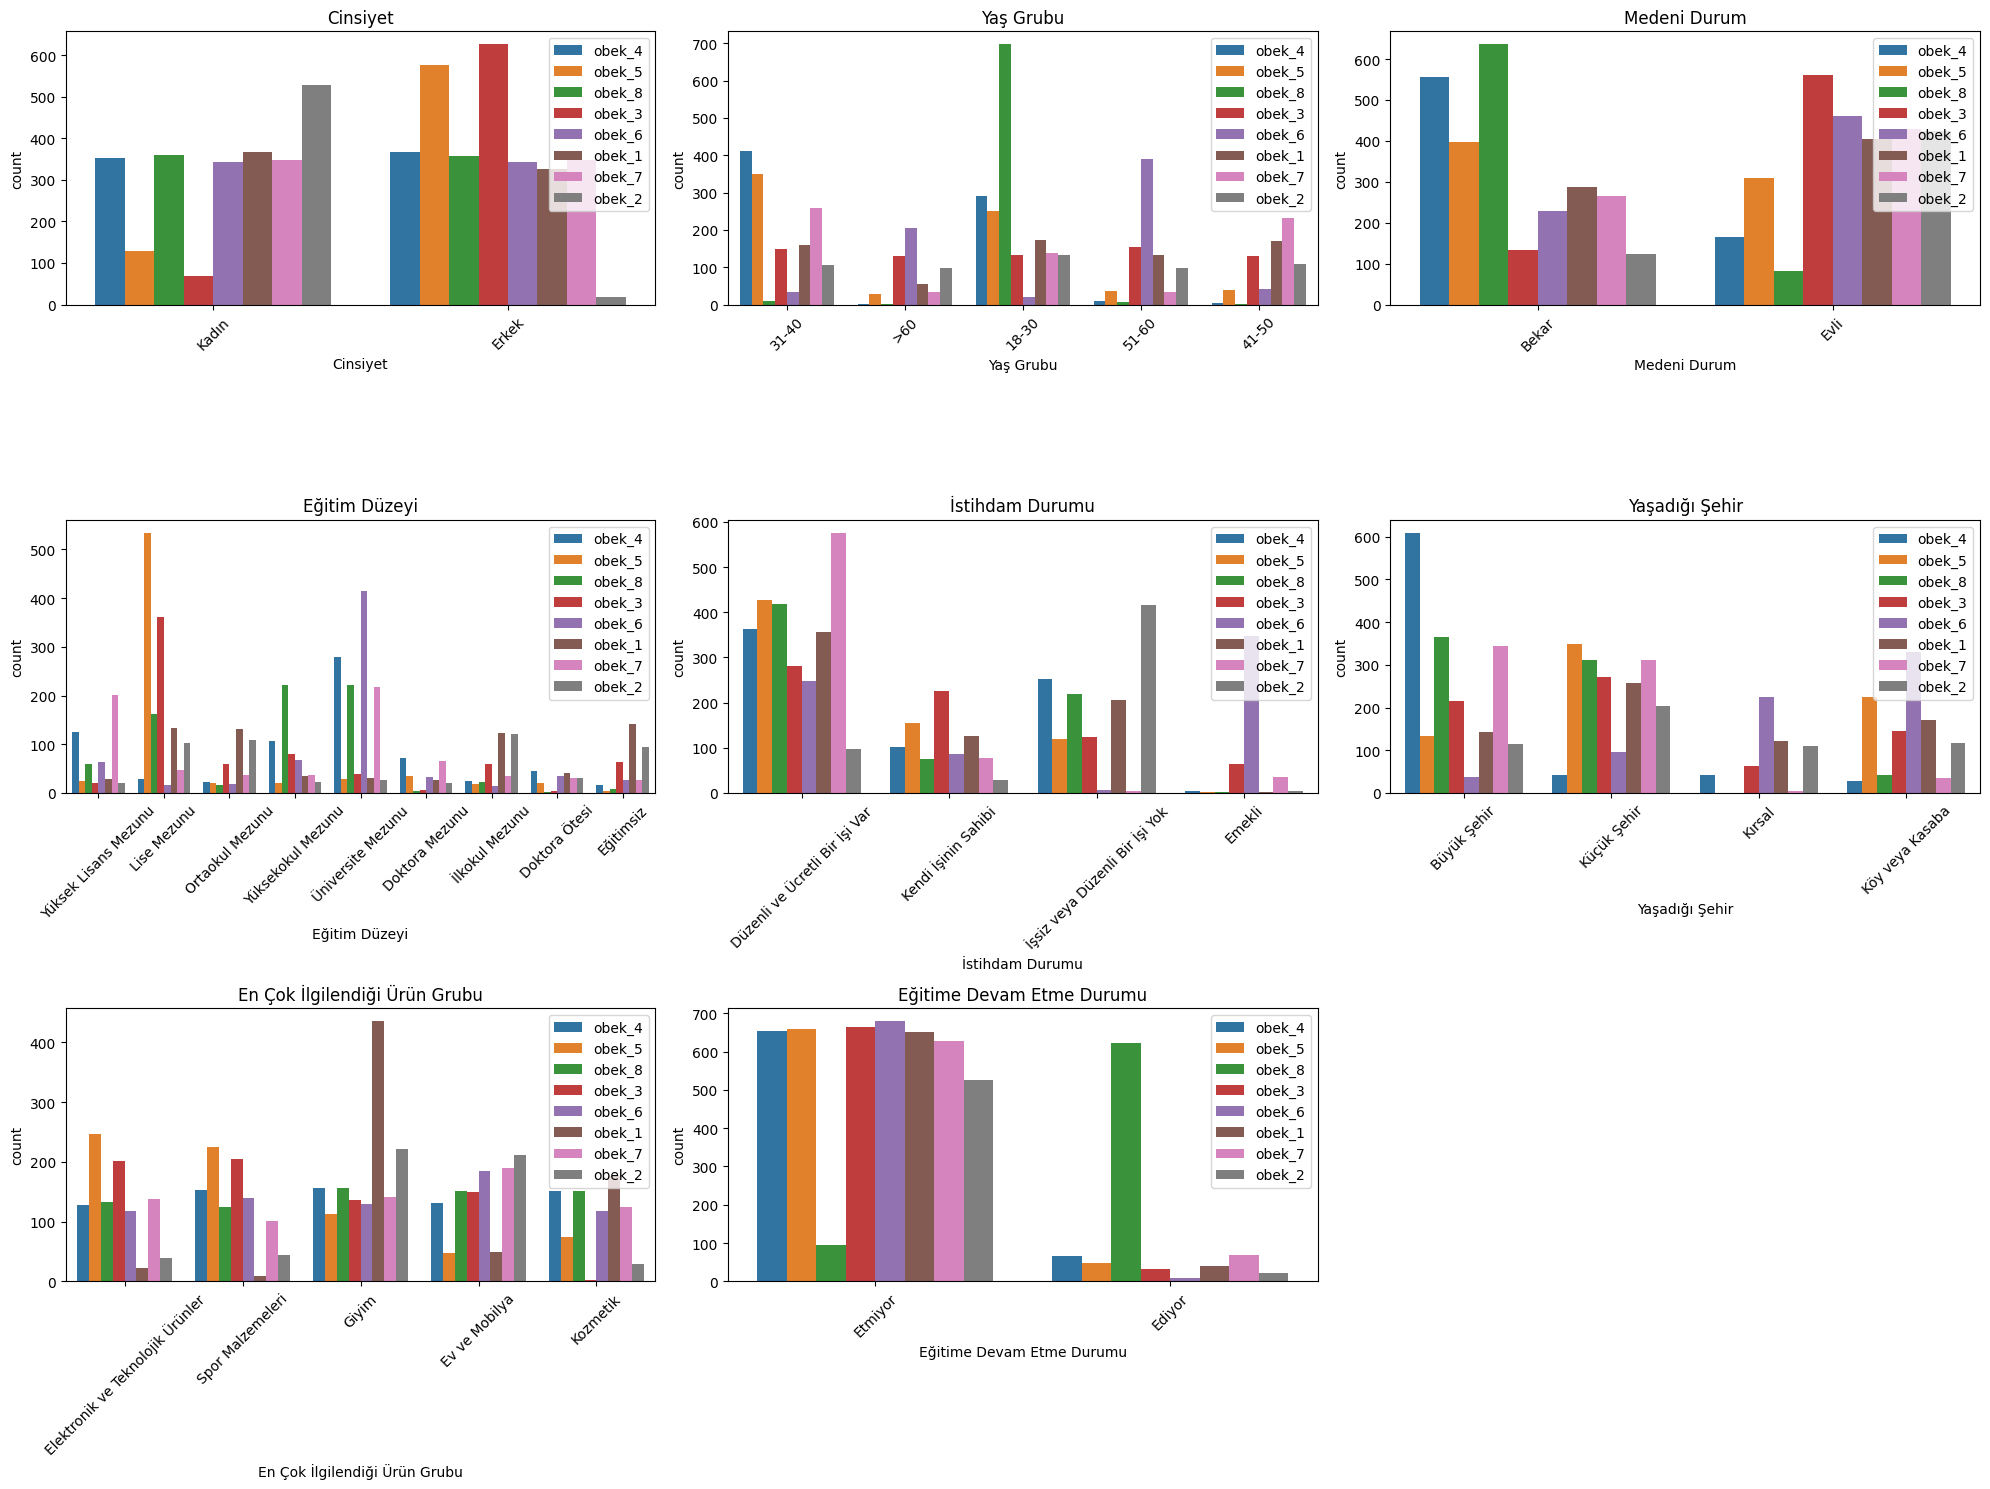

In [84]:
categorical_features = ['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi', 'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu', 'Eğitime Devam Etme Durumu']
plt.figure(figsize=(20, 15))
for idx, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, idx)
    sns.countplot(data=train, x=feature, hue='Öbek İsmi')
    plt.title(feature)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

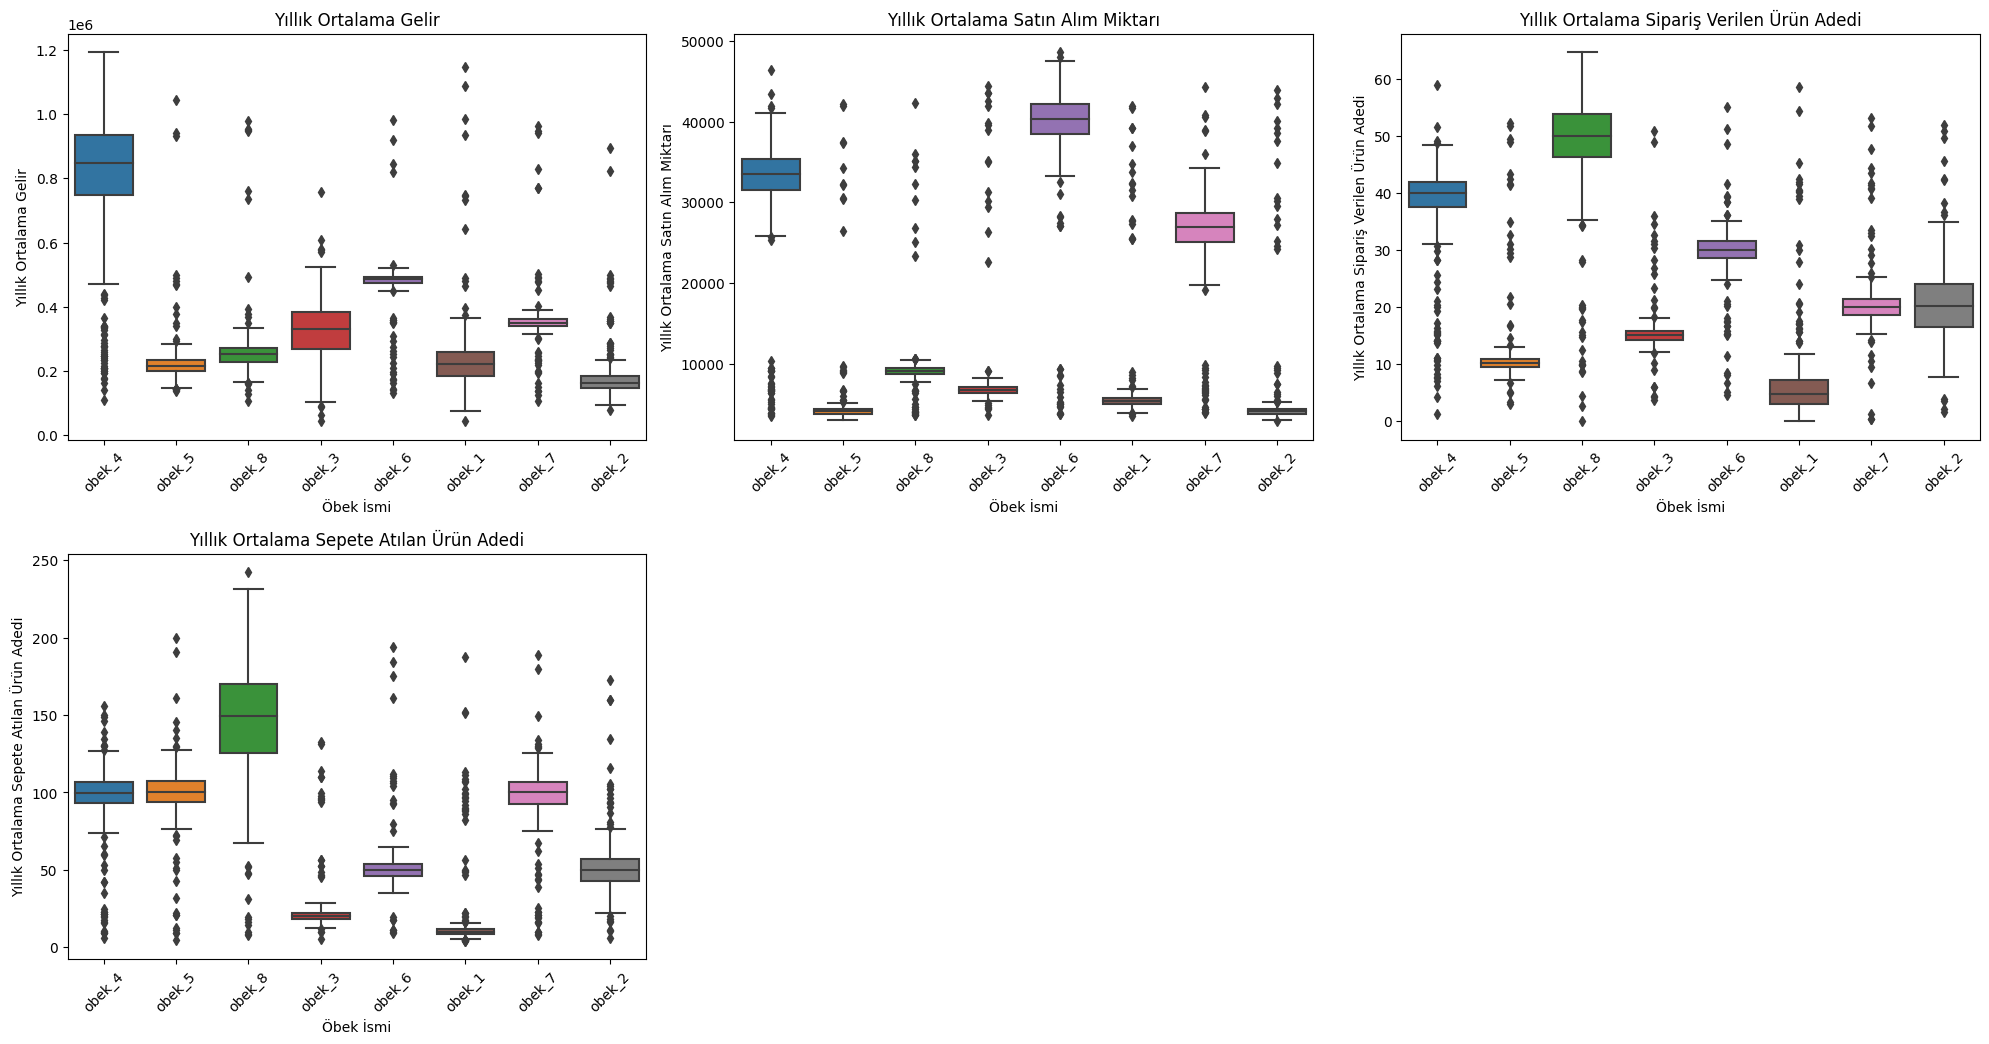

In [85]:
numerical_features = ['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi']
plt.figure(figsize=(20, 15))
for idx, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, idx)
    sns.boxplot(data=train, x='Öbek İsmi', y=feature)
    plt.title(feature)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

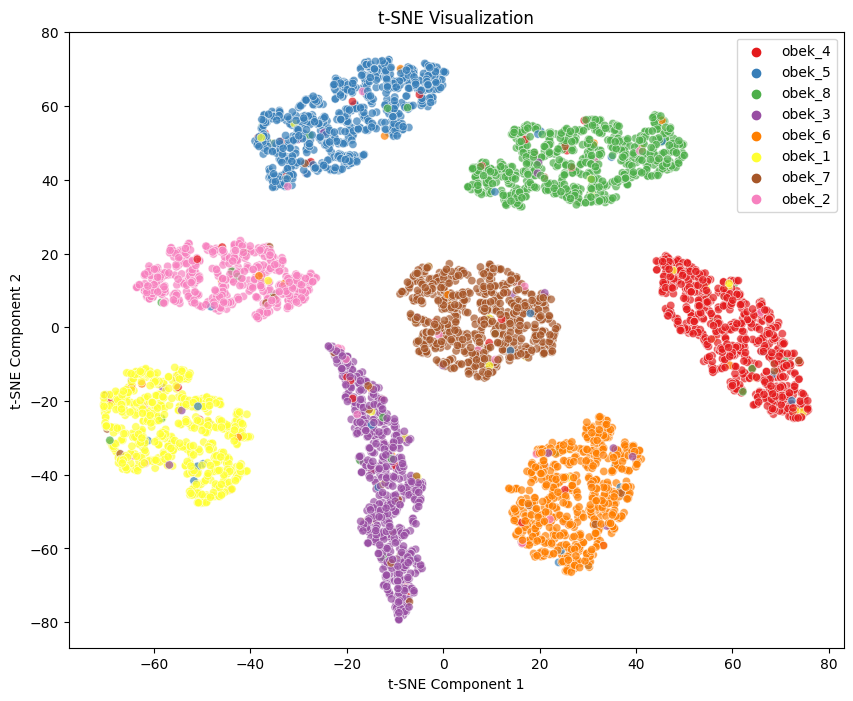

In [86]:
from sklearn.manifold import TSNE
import seaborn as sns
tsne_features = ['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi']
data_normalized = (train[tsne_features] - train[tsne_features].mean()) / train[tsne_features].std()

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_normalized)

tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE Component 1', 't-SNE Component 2'])
tsne_df['Target'] = train['Öbek İsmi']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='Target', data=tsne_df, palette='Set1', alpha=0.7)
plt.title('t-SNE Visualization')
plt.legend()
plt.savefig('result.png')
plt.show()

PreProcessing

In [87]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

cinsiyet = ohe.fit_transform(train.loc[:,['Cinsiyet']]).toarray()
cinsiyet = pd.DataFrame(data=cinsiyet, columns=['Erkek','Kadın'])

medeni_durum = ohe.fit_transform(train.loc[:,['Medeni Durum']]).toarray()
medeni_durum = pd.DataFrame(data=medeni_durum, columns=['Bekar','Evli'])

devam = ohe.fit_transform(train.loc[:,['Eğitime Devam Etme Durumu']]).toarray()
devam = pd.DataFrame(data=devam, columns=['Ediyor','Etmiyor'])

ilgilenme = ohe.fit_transform(train.loc[:,['En Çok İlgilendiği Ürün Grubu']]).toarray()
ilgilenme = pd.DataFrame(data=ilgilenme, columns=['Elektronik ve Teknolojik Ürünler','Ev ve Mobilya','Giyim','Kozmetik','Spor Malzemeleri'])

istihdam = ohe.fit_transform(train.loc[:,['İstihdam Durumu']]).toarray()
istihdam = pd.DataFrame(data=istihdam, columns=['Düzenli ve Ücretli Bir İşi Var','Emekli','İşsiz veya Düzenli Bir İşi Yok','Kendi İşinin Sahibi'])

sehir = ohe.fit_transform(train.loc[:,['Yaşadığı Şehir']]).toarray()
sehir = pd.DataFrame(data=sehir, columns=['Büyük Şehir','Kırsal','Köy veya Kasaba','Küçük Şehir'])

egitim = ohe.fit_transform(train.loc[:,['Eğitim Düzeyi']]).toarray()
egitim = pd.DataFrame(data=egitim, columns=['Doktora Mezunu','Doktora Ötesi','Eğitimsiz','İlkokul Mezunu','Lise Mezunu','Ortaokul Mezunu','Üniversite Mezunu','Yüksek Lisans Mezunu','Yüksekokul Mezunu'])

yas_grubu = ohe.fit_transform(train.loc[:,['Yaş Grubu']]).toarray()
yas_grubu = pd.DataFrame(data=yas_grubu, columns=['18-30','31-40','41-50','51-60','>60'])

s_train = pd.concat([cinsiyet,medeni_durum,devam,istihdam,ilgilenme,sehir,egitim,yas_grubu],axis=1)


In [88]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

cinsiyet = ohe.fit_transform(test.loc[:,['Cinsiyet']]).toarray()
cinsiyet = pd.DataFrame(data=cinsiyet, columns=['Erkek','Kadın'])

medeni_durum = ohe.fit_transform(test.loc[:,['Medeni Durum']]).toarray()
medeni_durum = pd.DataFrame(data=medeni_durum, columns=['Bekar','Evli'])

devam = ohe.fit_transform(test.loc[:,['Eğitime Devam Etme Durumu']]).toarray()
devam = pd.DataFrame(data=devam, columns=['Ediyor','Etmiyor'])

ilgilenme = ohe.fit_transform(test.loc[:,['En Çok İlgilendiği Ürün Grubu']]).toarray()
ilgilenme = pd.DataFrame(data=ilgilenme, columns=['Elektronik ve Teknolojik Ürünler','Ev ve Mobilya','Giyim','Kozmetik','Spor Malzemeleri'])

istihdam = ohe.fit_transform(test.loc[:,['İstihdam Durumu']]).toarray()
istihdam = pd.DataFrame(data=istihdam, columns=['Düzenli ve Ücretli Bir İşi Var','Emekli','İşsiz veya Düzenli Bir İşi Yok','Kendi İşinin Sahibi'])

sehir = ohe.fit_transform(test.loc[:,['Yaşadığı Şehir']]).toarray()
sehir = pd.DataFrame(data=sehir, columns=['Büyük Şehir','Kırsal','Köy veya Kasaba','Küçük Şehir'])

egitim = ohe.fit_transform(test.loc[:,['Eğitim Düzeyi']]).toarray()
egitim = pd.DataFrame(data=egitim, columns=['Doktora Mezunu','Doktora Ötesi','Eğitimsiz','İlkokul Mezunu','Lise Mezunu','Ortaokul Mezunu','Üniversite Mezunu','Yüksek Lisans Mezunu','Yüksekokul Mezunu'])

yas_grubu = ohe.fit_transform(test.loc[:,['Yaş Grubu']]).toarray()
yas_grubu = pd.DataFrame(data=yas_grubu, columns=['18-30','31-40','41-50','51-60','>60'])

s_test = pd.concat([cinsiyet,medeni_durum,devam,istihdam,ilgilenme,sehir,egitim,yas_grubu],axis=1)

Detecting Outliers

In [89]:
train2 = train.drop(columns=['index','Cinsiyet','Yaş Grubu','Medeni Durum','Eğitim Düzeyi','Yaşadığı Şehir', 'İstihdam Durumu','Eğitime Devam Etme Durumu', 'En Çok İlgilendiği Ürün Grubu'])
test2 = test.drop(columns=['index','Cinsiyet','Yaş Grubu','Medeni Durum','Eğitim Düzeyi','Yaşadığı Şehir', 'İstihdam Durumu','Eğitime Devam Etme Durumu', 'En Çok İlgilendiği Ürün Grubu'])
train2 = pd.concat([train2,s_train], axis=1)
test2 = pd.concat([test2,s_test],axis=1)
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for index,i in enumerate(data):
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(index)
    return outliers
sample_outlier = detect_outliers_zscore(train2.iloc[:,0])
print("Outliers from Z-scores method: ", sample_outlier)
sample_outlier2 = detect_outliers_zscore(train2.iloc[:,4])
print("Outliers from Z-scores method: ", sample_outlier2)
sample_outlier3 = []
for index,number in enumerate(train2.iloc[:,[12,33]].values):
    if (number[0] == 1 and number[1] == 1):
        sample_outlier3.append(index)
print(sample_outlier3)
result = []

for num in sample_outlier + sample_outlier2 + sample_outlier3:
    if num not in result:
        result.append(num)

print(result)
train3 = train2.drop(result,axis=0)

Outliers from Z-scores method:  [44, 68, 86, 134, 144, 335, 612, 620, 692, 744, 789, 927, 980, 1193, 1295, 1470, 1573, 1598, 1656, 1839, 1844, 1861, 1921, 1995, 2012, 2138, 2409, 2433, 2459, 2598, 2624, 2667, 2921, 3184, 3185, 3332, 3430, 3444, 3553, 3575, 3669, 3879, 3983, 4053, 4065, 4078, 4119, 4131, 4310, 4707, 4739, 4762, 5157, 5161, 5197, 5254, 5299, 5309, 5398, 5443, 5453]
Outliers from Z-scores method:  [5, 327, 1131, 1571, 1880, 2186, 2288, 3255, 3309, 3684, 4114]
[69, 401, 611, 952, 1545, 1620, 1640, 1773, 1968, 2464, 2470, 2490, 2616, 3271, 3369, 3475, 3584, 3867, 3954, 3982, 4254, 4524, 5028, 5332, 5375, 5416]
[44, 68, 86, 134, 144, 335, 612, 620, 692, 744, 789, 927, 980, 1193, 1295, 1470, 1573, 1598, 1656, 1839, 1844, 1861, 1921, 1995, 2012, 2138, 2409, 2433, 2459, 2598, 2624, 2667, 2921, 3184, 3185, 3332, 3430, 3444, 3553, 3575, 3669, 3879, 3983, 4053, 4065, 4078, 4119, 4131, 4310, 4707, 4739, 4762, 5157, 5161, 5197, 5254, 5299, 5309, 5398, 5443, 5453, 5, 327, 1131, 1571,

Train-Test Split

In [90]:
x = train3.drop(['Öbek İsmi'],axis=1)
y = train3['Öbek İsmi']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

KNN Algorithm

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
model = KNeighborsClassifier(n_neighbors=3,metric='minkowski')
model.fit(x,y)
tahmin = model.predict(X_test)
ac1 = accuracy_score(y_test,tahmin)

SVC Algorithm

In [92]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x,y)
tahmin2 = svc.predict(X_test)
ac2 = accuracy_score(y_test,tahmin2)

Gaussian Naive Bayes Algorithm

In [93]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x,y)
tahmin3 = gnb.predict(X_test)
ac3 = accuracy_score(y_test,tahmin3)

Decision Tree Algorithm

In [94]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(x,y)
tahmin4 = dtc.predict(X_test)
ac4 = accuracy_score(y_test,tahmin4)

Random Forest Algorithm(Chosen Algorithm)

In [95]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42,n_estimators=100,criterion='entropy')
rfc.fit(x,y)
tahmin5 = rfc.predict(X_test)
tahmin_sub = rfc.predict(test2)
ac5 = accuracy_score(y_test,tahmin5)

LGBM Algorithm

In [96]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_validate
lgbm_model = LGBMClassifier(n_estimators=10)
lgbm_model.fit(x,y)
tahmin6 = lgbm_model.predict(X_test)
ac6 = accuracy_score(y_test,tahmin6)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train set: 5362, number of used features: 37
[LightGBM] [Info] Start training from score -2.050401
[LightGBM] [Info] Start training from score -2.282644
[LightGBM] [Info] Start training from score -2.060597
[LightGBM] [Info] Start training from score -2.091827
[LightGBM] [Info] Start training from score -2.028895
[LightGBM] [Info] Start training from score -2.059134
[LightGBM] [Info] Start training from score -2.057673
[LightGBM] [Info] Start training from score -2.027477


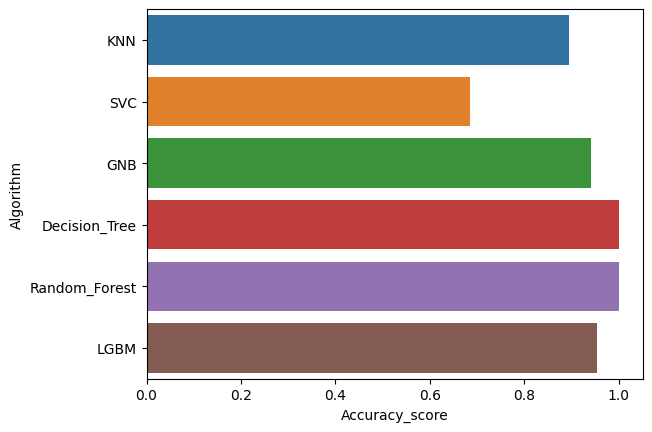

In [97]:
acs = pd.DataFrame({'Accuracy_score':[ac1,ac2,ac3,ac4,ac5,ac6],
                    'Algorithm':['KNN','SVC','GNB','Decision_Tree','Random_Forest','LGBM']})
sns.barplot(x="Accuracy_score",y="Algorithm",data=acs,orient="h")
plt.show()


Submission Data

In [98]:
veri = {
    'id': range(2340),
    'Öbek İsmi': tahmin_sub
}
tahmin_df = pd.DataFrame(veri)
tahmin_df.set_index('id', inplace=True)
tahmin_df.to_csv('submission.csv')